### BDR:Read Delhi metro Network Analysis
##### 1) Geospacial Analysis,  2) Temporal Analysis  3) Line Analysis 4) Station Layout Analysis 


1) Importing the Important libraries and Data set 

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns 
import copy
import folium 
import warnings
warnings.filterwarnings("ignore", category=ImportWarning)

#Reading Metro data 
df = pd.read_csv(r"E:\4.Data Analyst\Python\Python-Project-in GIT HUB\Metro Network Analysis\Delhi-Metro-Network.csv")

2) Overview of Data set 

In [149]:
#A)checking Data set
df.head(2)

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
0,1,Jhil Mil,10.3,Red line,2008-04-06,Elevated,28.67579,77.31239
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.67180,77.27756


In [150]:
#B)checking Data quality/ basics info of data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Station ID                285 non-null    int64  
 1   Station Name              285 non-null    object 
 2   Distance from Start (km)  285 non-null    float64
 3   Line                      285 non-null    object 
 4   Opening Date              285 non-null    object 
 5   Station Layout            285 non-null    object 
 6   Latitude                  285 non-null    float64
 7   Longitude                 285 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 17.9+ KB


3) Performing Baisc Analysis and refinement of data set 

In [151]:
#Basic Operations from above of  
#a) Handling Nan : Not required (no null value)
df.isnull().sum()
#b) Duplicate:
df.duplicated().sum()
#c) Changing data types: Here for Date columns 
df['Opening Date']=pd.to_datetime(df['Opening Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Station ID                285 non-null    int64         
 1   Station Name              285 non-null    object        
 2   Distance from Start (km)  285 non-null    float64       
 3   Line                      285 non-null    object        
 4   Opening Date              285 non-null    datetime64[ns]
 5   Station Layout            285 non-null    object        
 6   Latitude                  285 non-null    float64       
 7   Longitude                 285 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 17.9+ KB


4. Quantitative Analysis 

In [152]:
df.describe()
#from this we are getting someidea that longitude has mean aroung 77 but 
#min value is 28 means kind of outlier it(we will confirm by doing univarivariate and Multivariate analysis)

,Station ID,Distance from Start (km),Opening Date,Latitude,Longitude
count,285.000000,285.000000,285,285.000000,285.000000
mean,143.000000,19.218947,2013-01-23 09:00:37.894736896,28.595428,77.029315
min,1.000000,0.000000,2002-12-24 00:00:00,27.920862,28.698807
25%,72.000000,7.300000,2009-12-11 00:00:00,28.545828,77.107130
50%,143.000000,17.400000,2011-08-15 00:00:00,28.613453,77.207220
75%,214.000000,28.800000,2018-06-08 00:00:00,28.666360,77.281165
max,285.000000,52.700000,2019-09-03 00:00:00,28.878965,77.554479
std,82.416625,14.002862,NaN,0.091316,2.875400


5. Performing EDA

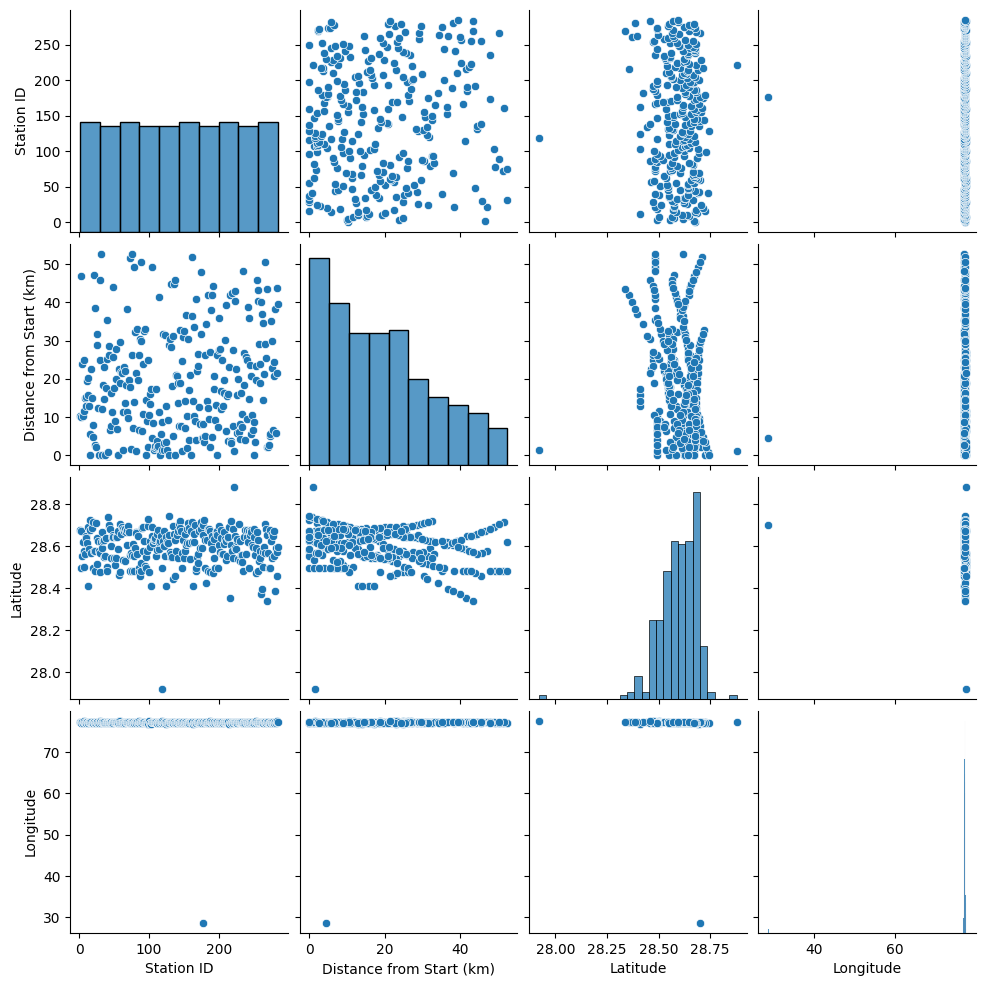

In [153]:
# visualize the relationships between pairs of variables in your DataFrame. 
sns.pairplot(df)

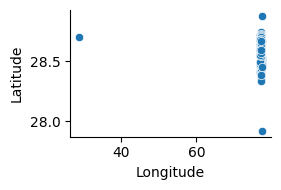

In [154]:
#from aobe pair plot it is clear that longitude had outliers 
#lets confirm with scatter plot
sns.relplot(data=df,x='Longitude', y='Latitude', kind='scatter', height=2, aspect=1.5)

In [155]:
#handling outliers 
df.sort_values('Longitude').head(2)
#from thi it clear: In shayan nagar station cordinate's longituge lets check and correct


,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
176,177,Shyam park,4.5,Red line,2019-08-03,Elevated,28.698807,28.698807
102,103,Noida Sector 147,17.3,Aqua line,2019-01-25,Elevated,28.408905,76.915523


In [156]:
#relacing the station 177 longitute cordinates 
#let make deep copy to avoide change of original 
metro_data = copy.deepcopy(df)
metro_data.at[176, 'Longitude']=77.22152461

### Now we have final cleaned Data set df_modified:on which we are going to perform below analysis

## 1) Geospatial Analysis

In [157]:
line_colors = {
    'Red line': 'red',
    'Blue line': 'blue',
    'Yellow line': 'beige',
    'Green line': 'green',
    'Voilet line': 'purple',
    'Pink line': 'pink',
    'Magenta line': 'darkred',
    'Orange line': 'orange',
    'Rapid Metro': 'cadetblue',
    'Aqua line': 'black',
    'Green line branch': 'lightgreen',
    'Blue line branch': 'lightblue',
    'Gray line': 'lightgray'
}
delhi_map_with_line_tooltip = folium.Map(location=[28.595428, 77.179315], zoom_start=10)

# adding colored markers for each metro station with line name in tooltip
for index, row in metro_data.iterrows():
    line = row['Line']
    color = line_colors.get(line, 'black')  # Default color is black if line not found in the dictionary
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Station Name']}",
        tooltip=f"{row['Station Name']}, {line}",
        icon=folium.Icon(color=color)
    ).add_to(delhi_map_with_line_tooltip)

# Displaying the updated map
delhi_map_with_line_tooltip

## 2) Temporal Analysis 

Text(0.5, 1.0, 'Number of Metro station opened per year in Delhi')

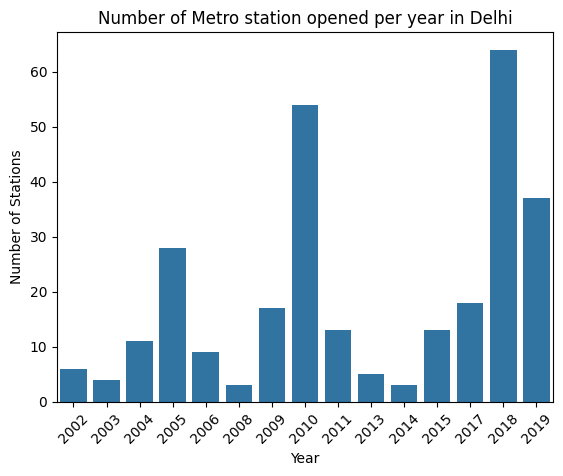

In [158]:

#create a new columns of Year and add in existing DF 
metro_data['Opening Year'] = metro_data['Opening Date'].dt.year

#counting of total metro stations opened per year 
stations_per_year = metro_data['Opening Year'].value_counts().sort_index()

#converting the above into DF & Renaming the columns 
stations_per_year_df = stations_per_year.reset_index()
# renaming the columns of abive 
stations_per_year_df.columns = ['Year', 'Number of Stations']

# #Ploting the Years vs Nos station opened per year 
# fig = px.bar(stations_per_year_df, x='Year', y='Number of Stations',
#              title="Number of Metro Stations Opened Each Year in Delhi",
#              labels={'Year': 'Year', 'Number of Stations': 'Number of Stations Opened'})

# fig.update_layout(xaxis_tickangle=-45, xaxis=dict(tickmode='linear'),
#                   yaxis=dict(title='Number of Stations Opened'),
#                   xaxis_title="Year")

sns.barplot(data=stations_per_year_df,x='Year', y= 'Number of Stations')
#Graph customisations 
plt.xticks(rotation=45 )  # Adjust the rotation angle as needed
plt.title('Number of Metro station opened per year in Delhi', loc='center')

### 3) Line Analysis 

<Axes: xlabel='Average Distance Between Stations (km)', ylabel='Line'>

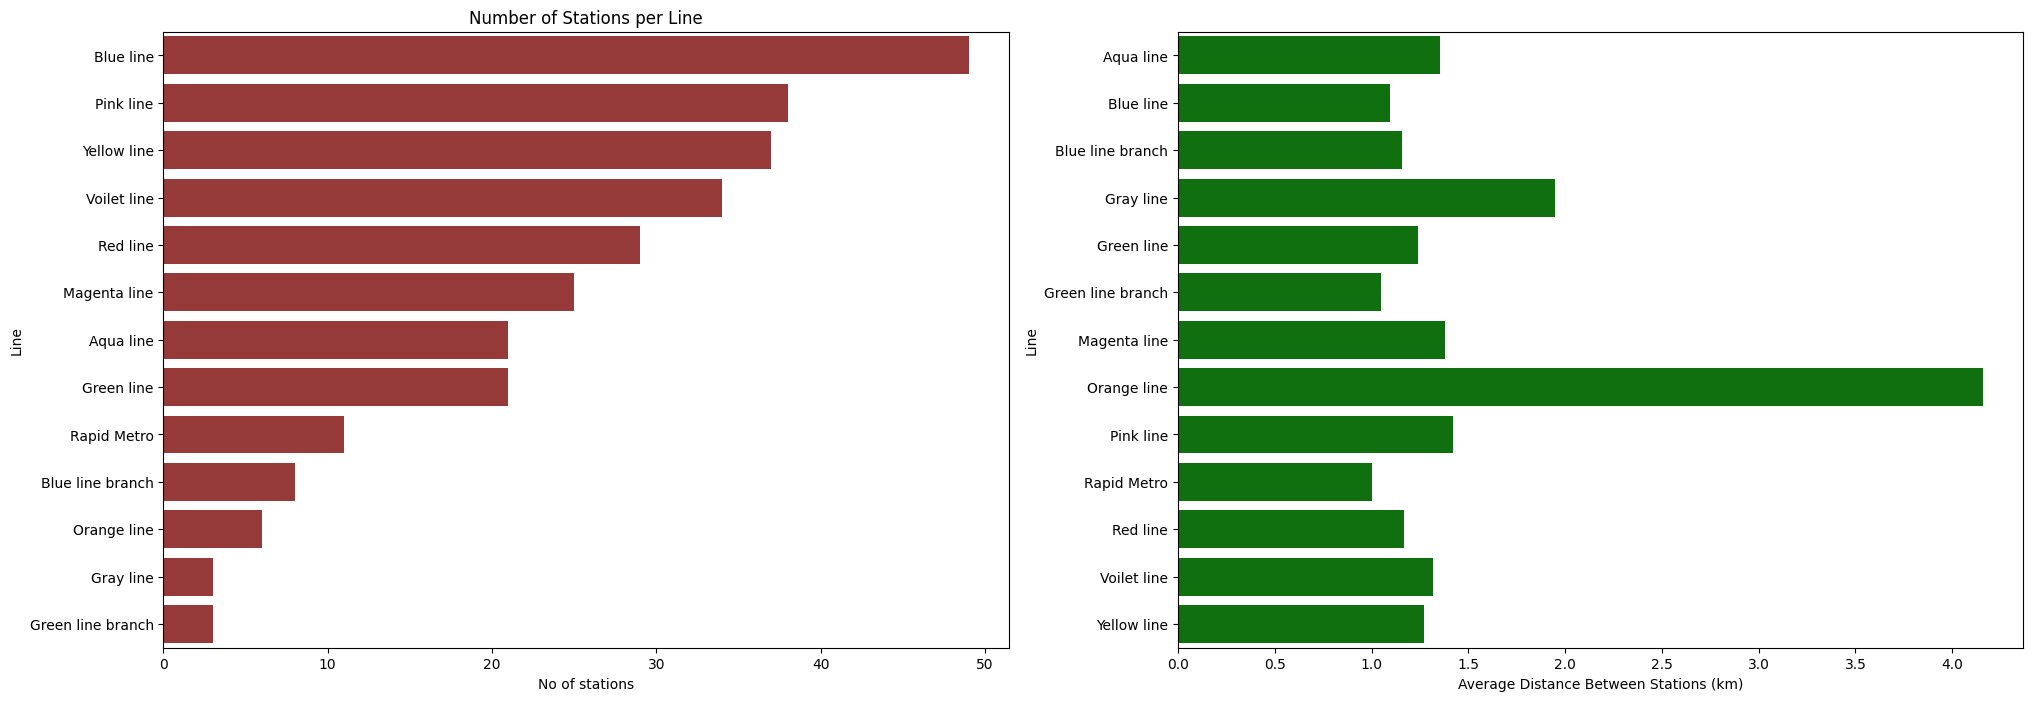

In [159]:
# A) No of station per metro line 
stations_per_metro_line= metro_data['Line'].value_counts()

#converting the aove into DF
line_analysis=pd.DataFrame(stations_per_metro_line).reset_index()
line_analysis.columns=['Line', 'No of stations']
# plot the graph for nos of station per line 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))
sns.barplot(data=line_analysis, x= 'No of stations',  y ='Line', ax=axes[0], color='brown')
# cotomize the graph
axes[0].set_title('Number of Stations per Line')

# B) average distance b/w stations 
total_distance_per_line=metro_data.groupby('Line')['Distance from Start (km)'].max()
avg_distance_per_line = total_distance_per_line / (stations_per_metro_line - 1)
avg_distance_bw_station_per_line= pd.DataFrame({'Average Distance Between Stations (km)': avg_distance_per_line}).reset_index()
#ploting the graph
sns.barplot(data=avg_distance_bw_station_per_line, x= 'Average Distance Between Stations (km)',  y ='Line', ax=axes[1], color='green')


### 4)Station Layout Analysis

<Figure size 1000x600 with 0 Axes>

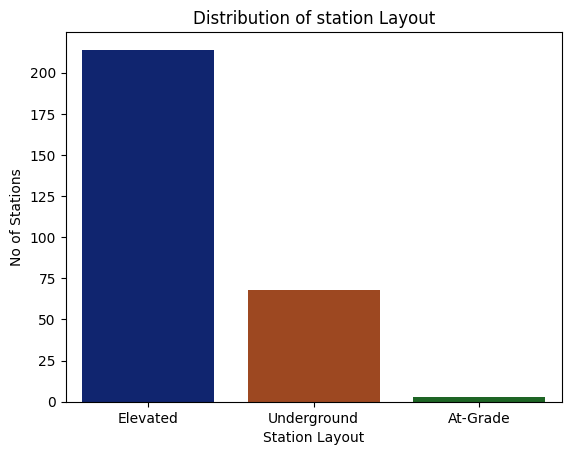

<Figure size 1000x600 with 0 Axes>

In [160]:
layout_count=metro_data['Station Layout'].value_counts()
#converting into data frame 
layout_analysis=layout_count.reset_index()
#changing the name of cols 
layout_analysis.columns=['Station Layout', 'No of Stations']

#ploting the graph 
sns.barplot(data=layout_analysis, x='Station Layout', y='No of Stations',  hue='Station Layout', palette='dark')
plt.title('Distribution of station Layout')
plt.figure(figsize=(10, 6))